# 最小二乘法

Text(0.5, 1.0, 'least_square')

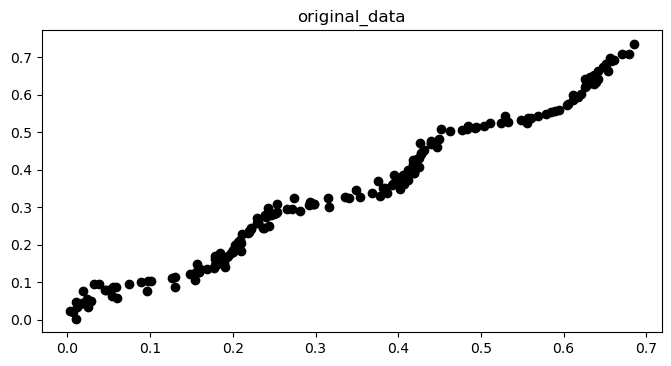

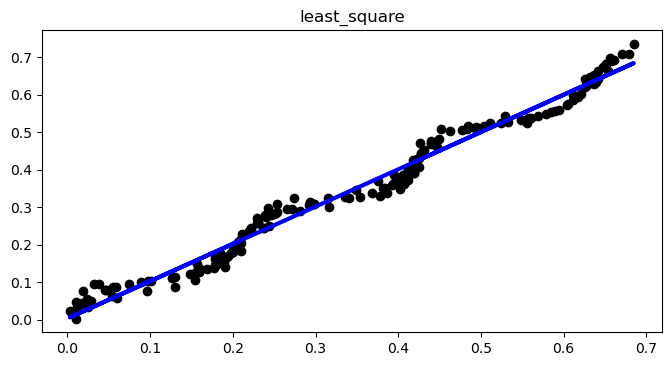

In [9]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#读取文件
data=pd.read_csv(r"D:\CDA\File\data_line.txt",sep='	',names=['x1','y'])
data['x0']=1
feature=data[['x0','x1']]#特征
label=data['y']#标签

#画原始数据图
plt.figure(figsize=(8,4),dpi=100)#inch，100
plt.scatter(data['x1'],label,color='black')#原始数据
plt.title("original_data")

#最小二乘法求解系数
feature_matrix=np.mat(feature)#转为矩阵，X
label_matrix=np.mat(label).T  
theta = (feature_matrix.T * feature_matrix).I * feature_matrix.T * label_matrix
y_predict=feature_matrix * theta
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(data['x1'],label,color='black')#原始数据
plt.plot(data['x1'],y_predict,color ='blue',linewidth=3)#拟合曲线
plt.title("least_square")

# 梯度下降法

Text(0.5, 1.0, 'y=x^2-4x')

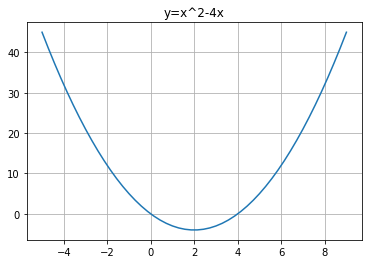

In [14]:
#画图
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.linspace(-5,9)#等差数列
y = x**2-4*x
plt.figure()
plt.plot(x,y)
plt.grid()
plt.title('y=x^2-4x')

In [15]:
#梯度下降法求解最小值
#f(x)的导数
def f_prime(x_old):
    return 2 * x_old - 4

x_old = 20#初始值
alpha = 0.001#步长，也就是学习速率，控制更新的幅度
for i in range(10000):
    x_new = x_old - alpha * f_prime(x_old)#上面提到的公式
    x_old = x_new
print(x_new)

2.0000000363651487


# 梯度下降法求最小值

Text(0, 0.5, 'error')

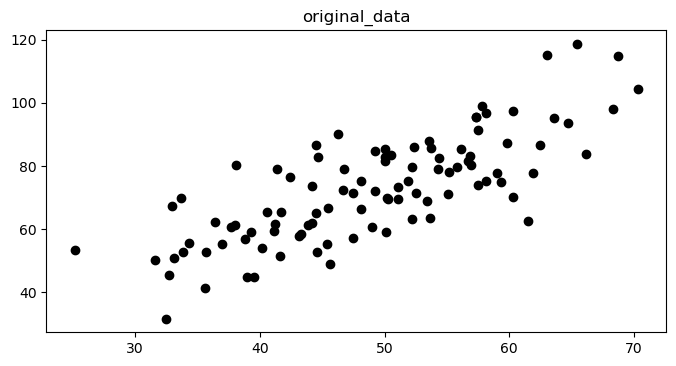

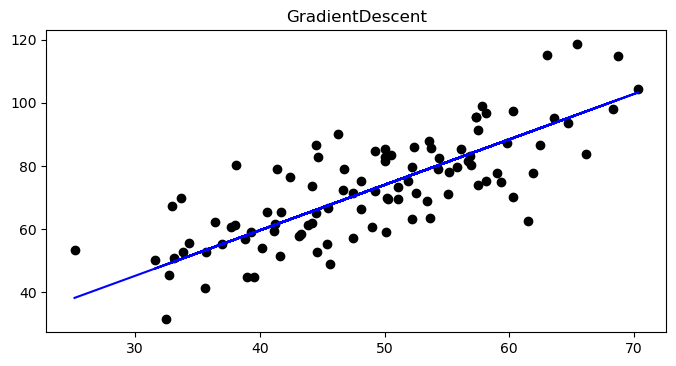

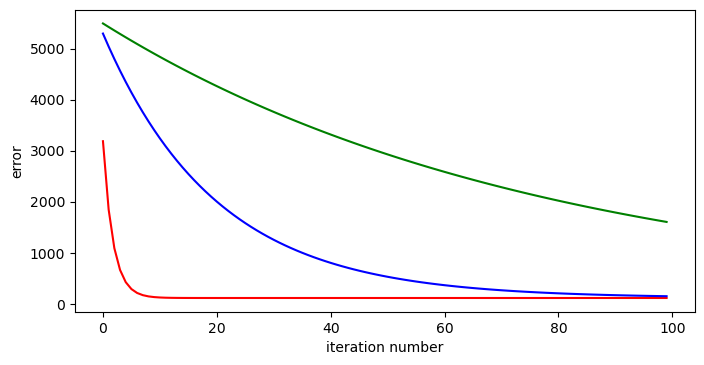

In [2]:
#梯度下降法
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# y = kx + b,k is slope, b is y-intercept

#更新一次
def step_gradient(b_current, k_current, points, learningRate):
    b_gradient = 0
    k_gradient = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        k_gradient += (((k_current * x) + b_current)-y)*x
        b_gradient += (((k_current * x) + b_current)-y)*1
    new_b = b_current - (learningRate * b_gradient)
    new_k = k_current - (learningRate * k_gradient)
    return [new_b, new_k]

#误差函数
def compute_error_for_line_given_points(b, k, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (k * x + b)) ** 2
    return totalError/len(points)


def gradient_descent_runner(points, starting_b, starting_k, learning_rate, num_iterations):
    b = starting_b
    k = starting_k
    error=[]
    for i in range(num_iterations):  #迭代多少次
        b, k = step_gradient(b, k, np.array(points), learning_rate)
        error.append(compute_error_for_line_given_points(b, k, points))
    return [b, k,error]
    


#画原始数据图
points = np.array(pd.read_csv(r"D:\CDA\File\data.csv", delimiter=",",names=['x1','y']))
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(points[:,0],points[:,1],color='black')
plt.title("original_data")


#梯度下降法
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(points[:,0],points[:,1],color='black')

learning_rate = 0.000001  #学习率
initial_b = 0 # initial y-intercept guess
initial_k = 0 # initial slope guess
num_iterations = 10000
[b, k, error1] = gradient_descent_runner(points, initial_b, initial_k, 0.000001, num_iterations)

[b, k, error2] = gradient_descent_runner(points, initial_b, initial_k, 0.0000001, num_iterations)

[b, k, error3] = gradient_descent_runner(points, initial_b, initial_k, 0.000008, num_iterations)


y_predict=points[:,0]*k+b
plt.plot(points[:,0],y_predict,color='blue')
plt.title("GradientDescent")

#迭代次数与误差的关系
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(num_iterations)[0:100],np.array(error1)[0:100],color='red')
plt.plot(range(num_iterations)[0:100],np.array(error2)[0:100],color='blue')
plt.plot(range(num_iterations)[0:100],np.array(error3)[0:100],color='green')
plt.xlabel("iteration number")                                   #添加x轴的名称
plt.ylabel("error") 

# sklearn中的线性回归

## 标准线性回归

In [4]:
#标准线性回归
from sklearn import linear_model
reg = linear_model.LinearRegression()        #创建模型
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) #训练，拟合
reg.predict([[4,4],[5,6]])#预测

array([4. , 5.5])

In [22]:
reg.predict([[1,4],[3,4]])#预测

array([2.5, 3.5])

In [23]:
reg.coef_#系数

array([0.5, 0.5])

In [24]:
reg.intercept_ #截距

1.1102230246251565e-16

## 岭回归

In [7]:
#岭回归
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 
reg.predict([[4,4],[3,4]])#预测

array([2.9       , 2.55454545])

## lasso回归

In [13]:
#lasso回归
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])

## 弹性网

In [30]:
#弹性网
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
X, y = make_regression(n_features=2)
regr = ElasticNet()
regr.fit(X, y)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
regr.score(X, y) 

0.87181811689964

In [14]:
print(regr.coef_) 
print(regr.intercept_) 
print(regr.predict([[0, 0]]))

[18.83816048 64.55968825]
1.4512607561654027
[1.45126076]


# 模型的优化：网格搜索

## 岭回归

In [18]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
def load_data():
    data=pd.read_csv(r'D:\CDA\File\abalone.txt',sep='	',names=['x1','x2','x3','x4','x5','x6','x7','x8','y'])
    feature=data.loc[:,'x1':'x8']
    label=data['y']
    return np.mat(feature), np.mat(label).T
X, y = load_data()
X, y = StandardScaler().fit_transform(X), StandardScaler().fit_transform(y)
params={'alpha':[0.001,0.01,0.1,1,10,100]}#粗调节
ridge = linear_model.Ridge()
grid_search=GridSearchCV(ridge,param_grid=params,cv=10)
grid_search.fit(X, y)
grid_search.best_params_

{'alpha': 10}

In [19]:
params={'alpha':[18,19,20,21,22,23]}#细调节
ridge = linear_model.Ridge()#
grid_search=GridSearchCV(ridge,params,cv=10)
grid_search.fit(X, y)
grid_search.best_params_

{'alpha': 19}

In [20]:
grid_search.score(X, y)

0.5245281478589314

## 弹性网

In [22]:
#弹性网
from sklearn.linear_model import ElasticNet
params={'alpha':[0.00001,0.001,0.01,0.1,1,10,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elasticNet = ElasticNet()
grid_search=GridSearchCV(elasticNet,param_grid=params,cv=10)
grid_search.fit(X, y)
grid_search.best_params_

{'alpha': 0.01, 'l1_ratio': 0.2}

# 波士顿房价预测

波士顿房价数据集（Boston House Price Dataset）  
该数据集是一个回归问题。每个类的观察值数量是均等的，共有 506 个观察，13 个输入变量和1个输出变量。  
每条数据包含房屋以及房屋周围的详细信息。其中包含城镇犯罪率，一氧化氮浓度，住宅平均房间数，到中心区域的加权距离以及自住房平均房价等等。  
CRIM：城镇人均犯罪率。  
ZN：住宅用地超过 25000 sq.ft. 的比例。  
INDUS：城镇非零售商用土地的比例。  
CHAS：查理斯河空变量（如果边界是河流，则为1；否则为0）。  
NOX：一氧化氮浓度。  
RM：住宅平均房间数。  
AGE：1940 年之前建成的自用房屋比例。  
DIS：到波士顿五个中心区域的加权距离。  
RAD：辐射性公路的接近指数。  
TAX：每 10000 美元的全值财产税率。  
PTRATIO：城镇师生比例。  
B：1000（Bk-0.63）^ 2，其中 Bk 指代城镇中黑人的比例。  
LSTAT：人口中地位低下者的比例。  
MEDV：自住房的平均房价，以千美元计。  

In [23]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
# 1、加载数据集
ld = load_boston()
x_train,x_test,y_train,y_test = train_test_split(ld.data,ld.target,test_size=0.25)

In [25]:
ld.data.shape

(506, 13)

In [27]:
ld.target.shape

(506,)

In [28]:
x_train.shape

(379, 13)

In [29]:
x_test.shape

(127, 13)

In [30]:
# 2、标准化处理
# 特征值处理
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

## 标准线性回归

lr的均方误差为： 24.026096337634424


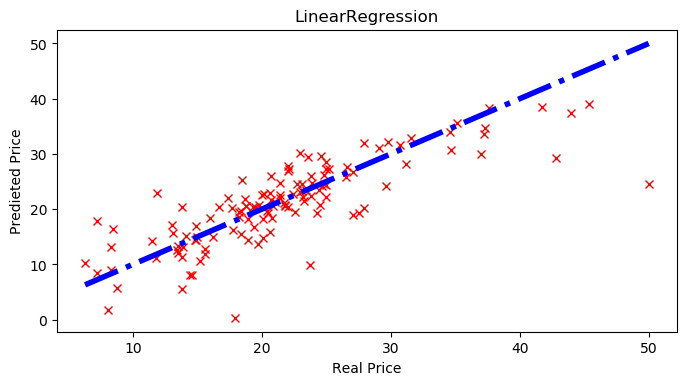

In [16]:
# LinearRegression
lr=LinearRegression().fit(x_train,y_train)
y_lr_predict = lr.predict(x_test)
print("lr的均方误差为：",mean_squared_error(y_test,y_lr_predict))
plt.figure(figsize=(8,4),dpi=100)
plt.title("LinearRegression")
plt.plot(y_test,y_lr_predict, 'rx')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-.', lw=4)  #  y=x
plt.ylabel("Predieted Price")
plt.xlabel("Real Price")
plt.show()

## 岭回归

In [17]:
params={'alpha':[0.001,0.01,0.1,1,10,100]}#粗调节
ridge = Ridge()#
grid_search=GridSearchCV(ridge,param_grid=params,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'alpha': 10}

Ridge的均方误差为： 23.39500881653347


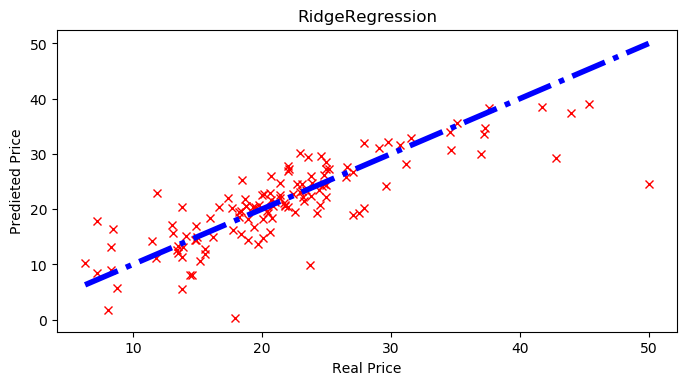

In [18]:
y_rd_predict = grid_search.predict(x_test)
print("Ridge的均方误差为：",mean_squared_error(y_test,y_rd_predict))
plt.figure(figsize=(8,4),dpi=100)
plt.title("RidgeRegression")
plt.plot(y_test,y_lr_predict, 'rx')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-.', lw=4)
plt.ylabel("Predieted Price")
plt.xlabel("Real Price")
plt.show()

## LASSO回归

In [13]:
params={'alpha':[0.001,0.01,0.1,1,10,100]}#粗调节
ridge = Lasso()#
grid_search=GridSearchCV(ridge,param_grid=params,cv=10)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'alpha': 0.01}

Lasso的均方误差为： 23.87998931032965


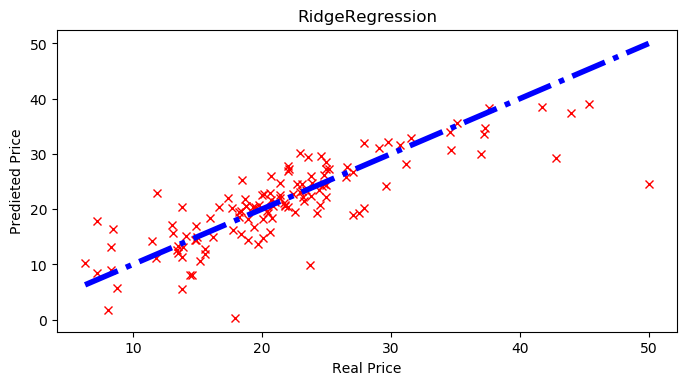

In [15]:
y_rd_predict = grid_search.predict(x_test)
print("Lasso的均方误差为：",mean_squared_error(y_test,y_rd_predict))
plt.figure(figsize=(8,4),dpi=100)
plt.title("RidgeRegression")
plt.plot(y_test,y_lr_predict, 'rx')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b-.', lw=4)
plt.ylabel("Predieted Price")
plt.xlabel("Real Price")
plt.show()